In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install lifelines

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,822 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

from sklearn.model_selection import train_test_split
from lifelines import CoxPHFitter

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pkg_resources

dists = [d for d in pkg_resources.working_set]
# Filter out distributions you don't care about and use.
dists

[zipp 3.7.0 (/usr/local/lib/python3.7/dist-packages),
 zict 2.0.0 (/usr/local/lib/python3.7/dist-packages),
 yellowbrick 1.3.post1 (/usr/local/lib/python3.7/dist-packages),
 xlwt 1.3.0 (/usr/local/lib/python3.7/dist-packages),
 xlrd 1.1.0 (/usr/local/lib/python3.7/dist-packages),
 xgboost 0.90 (/usr/local/lib/python3.7/dist-packages),
 xarray 0.18.2 (/usr/local/lib/python3.7/dist-packages),
 wrapt 1.13.3 (/usr/local/lib/python3.7/dist-packages),
 wordcloud 1.5.0 (/usr/local/lib/python3.7/dist-packages),
 widgetsnbextension 3.5.2 (/usr/local/lib/python3.7/dist-packages),
 wheel 0.37.1 (/usr/local/lib/python3.7/dist-packages),
 Werkzeug 1.0.1 (/usr/local/lib/python3.7/dist-packages),
 webencodings 0.5.1 (/usr/local/lib/python3.7/dist-packages),
 wcwidth 0.2.5 (/usr/local/lib/python3.7/dist-packages),
 wasabi 0.9.0 (/usr/local/lib/python3.7/dist-packages),
 vega-datasets 0.9.0 (/usr/local/lib/python3.7/dist-packages),
 urllib3 1.24.3 (/usr/local/lib/python3.7/dist-packages),
 uritemplate 

### lifelines / CoxPHFitter : original data set (Data Imputation, No scaling, No feature engineering)

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/FactoryHack2022/Final/data/Imputed_data.xlsx')

df2 = df[df['현재 상태'] != 'Lamp fail']


df2 = df2.drop(['Lot No.'], axis = 1)
encoding_dict = {'현재 상태' : {'Alive' : False, 'Gas leak' : True}}
df2 = df2.replace(encoding_dict)


from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size = 0.3, random_state = 42)

X_train = train.drop(['현재 상태', 'y_cum_time'], axis = 1)
X_test = test.drop(['현재 상태', 'y_cum_time'], axis = 1)

y_train = np.array(list(zip(train['현재 상태'], train['y_cum_time'])), dtype = "?,f")
y_test = np.array(list(zip(test['현재 상태'], test['y_cum_time'])), dtype = "?,f")

cph = CoxPHFitter()  # create cph object
cph.fit(train, 'y_cum_time', event_col = '현재 상태')

cph.print_summary()



<lifelines.CoxPHFitter: fitted with 210 total observations, 87 right-censored observations>
             duration col = 'y_cum_time'
                event col = '현재 상태'
      baseline estimation = breslow
   number of observations = 210
number of events observed = 123
   partial log-likelihood = -552.15
         time fit was run = 2022-01-23 11:27:37 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
Test No.       -0.01       0.99       0.23            -0.47             0.45                 0.63                 1.56
Lamp Ver. No.   0.02       1.02       0.16            -0.29             0.32                 0.75                 1.38
Chamber No.     0.00       1.00       0.04            -0.07             0.07                 0.93                 1.08
1-수소공급량         0.01       1.01       0.13            -0.25             0.26                 0.78                 1.30
2-수소공급량         0.00       1.00       0.10            -0.20             0.20                 0.82                 1.22
1-산소공급량        -0.01       0.99       0.07            -0.14             0.12                 0.87                 1.13
2-산소공급량        -0.00       1.00       0.03            -0.06             0.06                 0.94                 1.06
1-버너회전수         0.08       1.08       0.53            -0.97             1.12                 0.38                 3.08
2-버너회전수        -0.05       0.95       0.37            -0.77             0.66                 0.46                 1.94
1-버너속도          0.02       1.02       0.40            -0.76             0.80                 0.47                 2.22
2-버너속도         -0.01       0.99       0.32            -0.64             0.62                 0.53                 1.87
1-핀치횟수         -0.02       0.98       0.08            -0.17             0.13                 0.85                 1.14
2-핀치횟수          0.02       1.02       0.08            -0.13             0.17                 0.88                 1.18
핀치두께-상          0.22       1.24       3.74            -7.11             7.54                 0.00              1887.99
핀치두께-중          0.23       1.26       1.13            -1.99             2.45                 0.14                11.61
핀치두께-하         -0.33       0.72       3.52            -7.24             6.57                 0.00               716.22
핀치두께2-상         0.32       1.38       2.20            -4.00             4.64                 0.02               103.57
핀치두께2-중        -0.21       0.81       0.75            -1.68             1.27                 0.19                 3.54
핀치두께2-하        -0.01       0.99       1.64            -3.23             3.20                 0.04                24.65
전극간격           -0.00       1.00       0.03            -0.06             0.06                 0.94                 1.06
채널              0.00       1.00       0.08            -0.15             0.15                 0.86                 1.17
전압(1차)         -0.01       0.99       0.09            -0.18             0.17                 0.84                 1.18
전류(1차)         -0.06       0.94       0.92            -1.87             1.75                 0.15                 5.74
역률(1차)         -0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
전력(1차)          0.07       1.07       1.22            -2.32             2.46                 0.10                11.68
온도(1차)          0.00       1.00       0.08            -0.15             0.15                 0.86                 1.17
전압(2차)         -0.00       1.00       0.02            -0.05             0.05                 0.95                 1.05
전류(2차)         -0.05       0.96       1.61            -3.21             3.12                 0.04                22.63
역률(2차)          0.04       1.04       0.90            -1.72         

In [ ]:
preds = cph.predict_survival_function(X_test)
preds

,204,267,153,9,234,227,197,110,5,176,238,57,219,45,183,222,290,212,149,166,78,114,250,251,105,42,282,296,158,239,17,165,33,24,216,120,7,91,46,73,...,181,145,240,75,298,279,98,93,193,25,233,59,6,186,174,30,22,257,56,187,109,127,231,194,130,283,82,84,66,289,164,155,19,125,79,115,119,72,15,10
20.68,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
22.13,0.995546,0.995082,0.994945,0.995604,0.995282,0.995259,0.995434,0.995902,0.996171,0.995033,0.995184,0.995573,0.995417,0.995813,0.995002,0.995431,0.993424,0.995455,0.995233,0.995075,0.995116,0.995988,0.993923,0.993942,0.995607,0.995176,0.994543,0.994819,0.995215,0.995213,0.995428,0.995135,0.995157,0.995215,0.995151,0.995271,0.995704,0.995437,0.995664,0.995852,...,0.994968,0.994929,0.995133,0.995743,0.994536,0.994773,0.995519,0.995684,0.995382,0.995288,0.995521,0.995479,0.995460,0.994968,0.995066,0.995522,0.995150,0.994008,0.995646,0.995056,0.995935,0.995259,0.995404,0.995524,0.995263,0.994572,0.995526,0.995518,0.995598,0.993321,0.994936,0.995257,0.995264,0.995353,0.995497,0.995875,0.995611,0.995742,0.995177,0.995108
81.85,0.995546,0.995082,0.994945,0.995604,0.995282,0.995259,0.995434,0.995902,0.996171,0.995033,0.995184,0.995573,0.995417,0.995813,0.995002,0.995431,0.993424,0.995455,0.995233,0.995075,0.995116,0.995988,0.993923,0.993942,0.995607,0.995176,0.994543,0.994819,0.995215,0.995213,0.995428,0.995135,0.995157,0.995215,0.995151,0.995271,0.995704,0.995437,0.995664,0.995852,...,0.994968,0.994929,0.995133,0.995743,0.994536,0.994773,0.995519,0.995684,0.995382,0.995288,0.995521,0.995479,0.995460,0.994968,0.995066,0.995522,0.995150,0.994008,0.995646,0.995056,0.995935,0.995259,0.995404,0.995524,0.995263,0.994572,0.995526,0.995518,0.995598,0.993321,0.994936,0.995257,0.995264,0.995353,0.995497,0.995875,0.995611,0.995742,0.995177,0.995108
98.00,0.995546,0.995082,0.994945,0.995604,0.995282,0.995259,0.995434,0.995902,0.996171,0.995033,0.995184,0.995573,0.995417,0.995813,0.995002,0.995431,0.993424,0.995455,0.995233,0.995075,0.995116,0.995988,0.993923,0.993942,0.995607,0.995176,0.994543,0.994819,0.995215,0.995213,0.995428,0.995135,0.995157,0.995215,0.995151,0.995271,0.995704,0.995437,0.995664,0.995852,...,0.994968,0.994929,0.995133,0.995743,0.994536,0.994773,0.995519,0.995684,0.995382,0.995288,0.995521,0.995479,0.995460,0.994968,0.995066,0.995522,0.995150,0.994008,0.995646,0.995056,0.995935,0.995259,0.995404,0.995524,0.995263,0.994572,0.995526,0.995518,0.995598,0.993321,0.994936,0.995257,0.995264,0.995353,0.995497,0.995875,0.995611,0.995742,0.995177,0.995108
100.42,0.995546,0.995082,0.994945,0.995604,0.995282,0.995259,0.995434,0.995902,0.996171,0.995033,0.995184,0.995573,0.995417,0.995813,0.995002,0.995431,0.993424,0.995455,0.995233,0.995075,0.995116,0.995988,0.993923,0.993942,0.995607,0.995176,0.994543,0.994819,0.995215,0.995213,0.995428,0.995135,0.995157,0.995215,0.995151,0.995271,0.995704,0.995437,0.995664,0.995852,...,0.994968,0.994929,0.995133,0.995743,0.994536,0.994773,0.995519,0.995684,0.995382,0.995288,0.995521,0.995479,0.995460,0.994968,0.995066,0.995522,0.995150,0.994008,0.995646,0.995056,0.995935,0.995259,0.995404,0.995524,0.995263,0.994572,0.995526,0.995518,0.995598,0.993321,0.994936,0.995257,0.995264,0.995353,0.995497,0.995875,0.995611,0.995742,0.995177,0.995108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

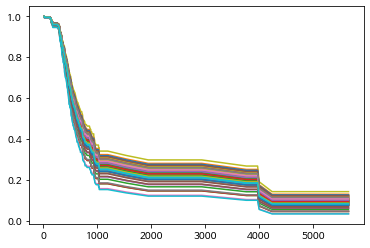

In [ ]:
cph.predict_survival_function(X_test).plot(legend=None)


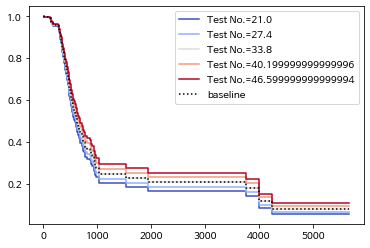

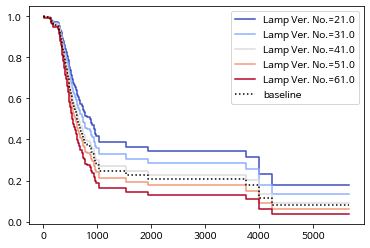

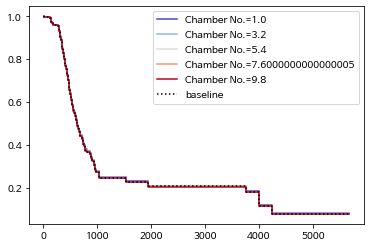

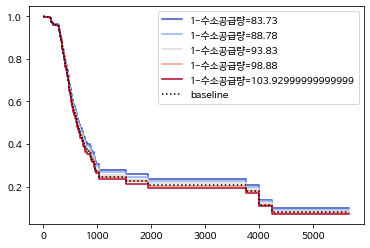

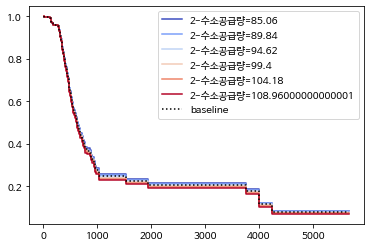

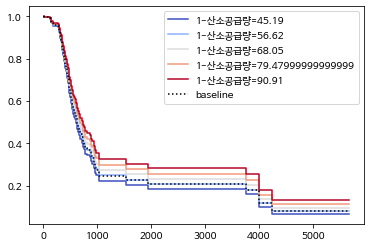

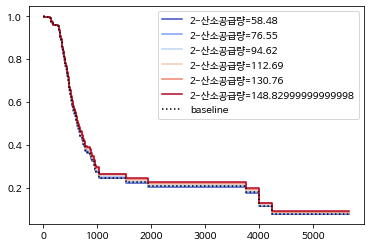

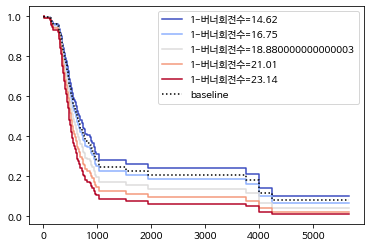

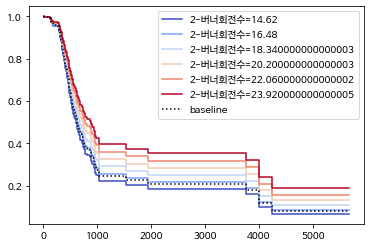

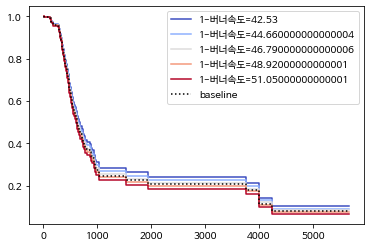

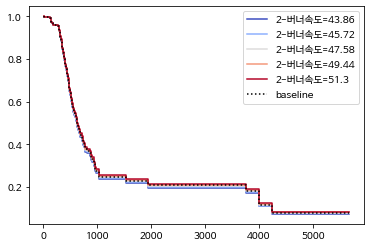

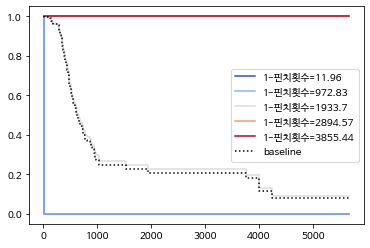

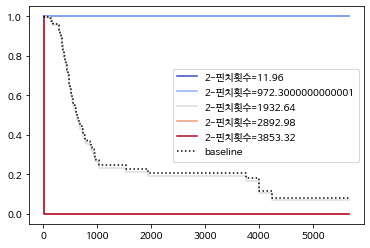

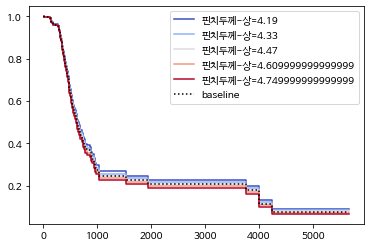

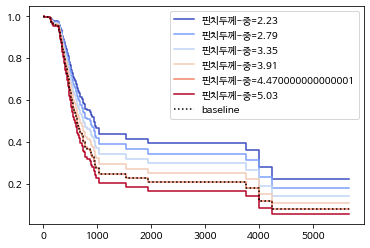

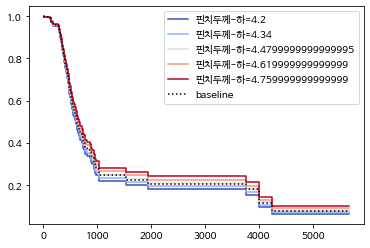

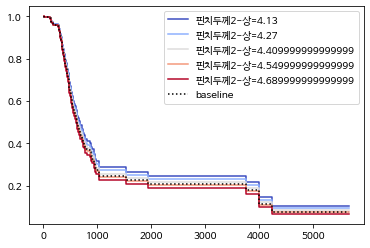

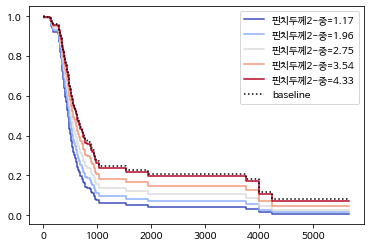

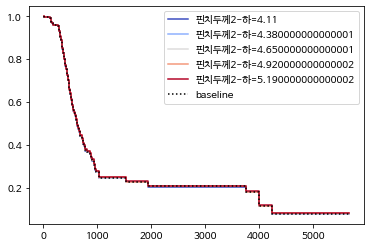

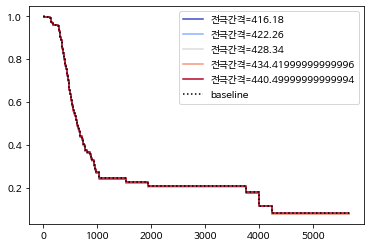

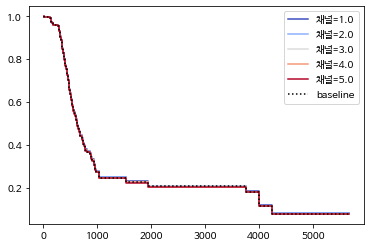

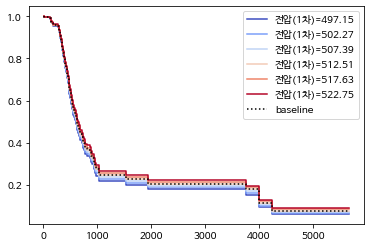

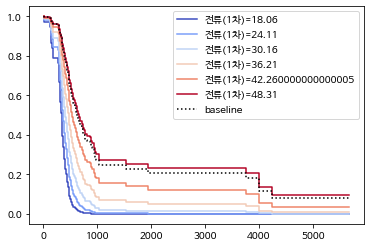

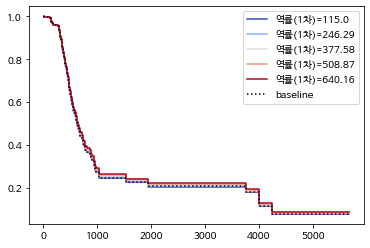

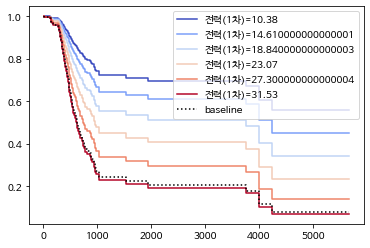

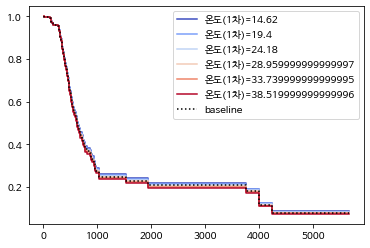

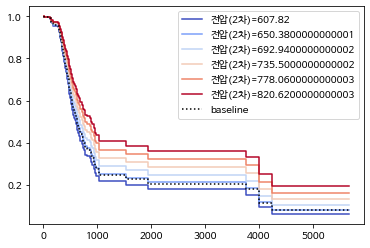

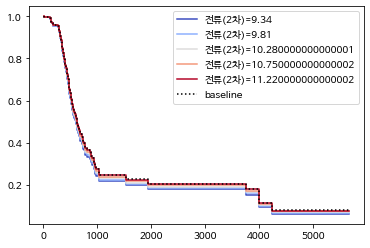

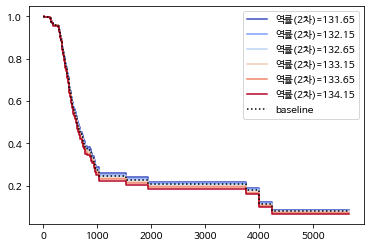

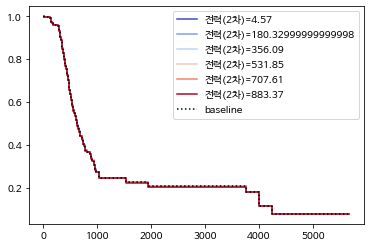

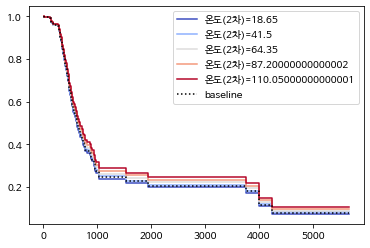

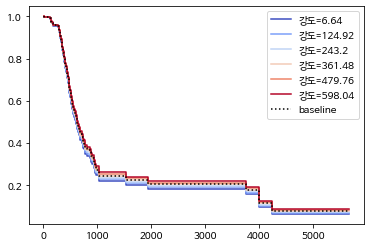

In [ ]:
import matplotlib.pyplot as plt

import math
import warnings
warnings.filterwarnings("ignore")

times = np.arange(0, 6000)

features = train.drop(['현재 상태','y_cum_time'], axis = 1).columns

for i in range(len(features)):
  cph.plot_partial_effects_on_outcome(features[i], np.arange( round(min(train[features[i]]),2), round(max(train[features[i]]),2), round((max(train[features[i]])-min(train[features[i]]))/5,2)), cmap='coolwarm')
  plt.show()